# Little, Big Data Front Script
## For use with "LittleBigData.py"
### Emily Stark
### April, 30th, 2019

This script is intended for use to analyze datasets with restricted sample size and high dimensional data. In order to complete this analysis, you must have LittleBigData.py in the same folder as this script. Your data do not need to be in the same directory, but the directory must be known.

In [1]:
 from LittleBigData import *

/home/olfaction/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## List of Functions:

*Preproc(x, w, Xstart, Xend, Wstart, Wend, trainfiledir, valfiledir, classtargets, header, testfiledir = None)*
 - **x** (integer), how many rows each input contains
 
 - **w** (integer), how many columns each input contains
 
 - **Xstart**, Xend, Wstart, Wend (integer), which row/column to start/end analysis, used for cropping
 
 - **trainfiledir**, **valfiledir**, **testfiledir** (string), file path to location of .csv files of data for training, validation, and testing (if provided)
 
 - **classtargets** (list), the marker in the file name that denotes ground truth label
 
 - **header** (interger), number of rows to skip in the .csv file of data
 
***

*Modeltrain(Xtrain, Ytrain, Xval, Yval, mname, net = '5FCN', ep = 80, bsize = 50)*
 - **Xtrain**, **Xval** (array), 4D tensor containing data with the first dimension representing inputs, second representing rows for each input, third represnting columns for each input, and fourth representing channels for each input (usually only 1).
 
 - **Ytrain**, **Yval** (array), one-hot vector containing ground truth labels for each input.
 
 - **mname** (string), name of the model for tensorboard and to save progress.
 
 - **net** (string or specified architecture), can choose '3FCN', '5FCN', or 'AlexNet' to select prewritten architectures or write your own and specify the variable name here. Default is 5FCN.
 
 - **ep** (integer), number of epochs. Defaul 80.
 
 - **bsize** (integer), batch size. Default 50.
 
 - - **OS** (string), either 'Colab' or 'Linux' used to show Tensorboard. If running on Windows, do not specify anything, defaults to None
 
***

*DeepDiscovery(Xval, Yval, classnames, n, modeldir = None, mname = None, model = None, net = '5FCN')*
 - **classnames** (list), character strings representing class names in the order of representation in the one-hot vector.
 
 - **n** (integer), number of inputs per sample.
 
 - **modeldir** (string) and **mname** (string), file path to the saved model and the model name to load in weights. Must either include this or model.
 
 - **model** (trained model), variable for the model already loaded into the jupyter notebook.
 
***

*GestaltDL(Xval, Yval, valnames, classnames, n, perc,  Xtest = None, Ytest = None, testnames = None, modeldir = None, mname = None, model = None, net = '5FCN')*
 - **valnames**/**testnames** (list), names of the samples in the validation/testing set (generally use file names).
 
 - **perc** (integer), number between 0 and 100 of the percentile of interest for identifying strong signals (i.e. if looking for the top 10% of signals, choose 90).
 


## Completing Little, Big Data Analysis
Use the following four blocks of code to complete the preprocessing, model training, and postprocessing. Once the model is trained, DeepDiscovery will show where in the sample the model is confident in the correct classification across all classes. You may decide to crop to that region or continue on to GestaltDL.

In [2]:
## Code to save my valnames and testnames
import os
import glob

os.chdir('.../Val')
valnames = glob.glob('*csv')
os.chdir('.../Test')
testnames = glob.glob('*csv')

## Preprocessing

In [3]:
Xtrain, Ytrain, Xval, Yval, Xtest, Ytest = Preproc(x = 1000, w = 100, Xstart = 0, Xend = 1000, 
                                                   Wstart = 0, Wend = 5000, 
        trainfiledir = '.../Train', 
        valfiledir = '.../Val', 
        testfiledir = '.../Test', 
        classtargets = ['A','B'], header = 0)

train_AAA_0.csv
train_AAA_1.csv
train_AAA_2.csv
train_AAA_3.csv
train_AAA_4.csv
train_AAA_5.csv
train_AAA_6.csv
train_AAA_7.csv
train_AAA_8.csv
train_AAA_9.csv
train_AAA_10.csv
train_AAA_11.csv
train_AAA_12.csv
train_AAA_13.csv
train_AAA_14.csv
train_AAA_15.csv
train_AAA_16.csv
train_AAA_17.csv
train_AAA_18.csv
train_AAA_19.csv
train_BBB_0.csv
train_BBB_1.csv
train_BBB_2.csv
train_BBB_3.csv
train_BBB_4.csv
train_BBB_5.csv
train_BBB_6.csv
train_BBB_7.csv
train_BBB_8.csv
train_BBB_9.csv
train_BBB_10.csv
train_BBB_11.csv
train_BBB_12.csv
train_BBB_13.csv
train_BBB_14.csv
train_BBB_15.csv
train_BBB_16.csv
train_BBB_17.csv
train_BBB_18.csv
train_BBB_19.csv
val_AAA_0.csv
val_AAA_1.csv
val_AAA_2.csv
val_AAA_3.csv
val_AAA_4.csv
val_AAA_5.csv
val_AAA_6.csv
val_AAA_7.csv
val_AAA_8.csv
val_AAA_9.csv
val_AAA_10.csv
val_AAA_11.csv
val_AAA_12.csv
val_AAA_13.csv
val_AAA_14.csv
val_BBB_0.csv
val_BBB_1.csv
val_BBB_2.csv
val_BBB_3.csv
val_BBB_4.csv
val_BBB_5.csv
val_BBB_6.csv
val_BBB_7.csv
val_BBB_8.csv

It is recommended that you save your tensors as .npy files so you can load them in without having to preprocess your data again. To do so, change your directory and use the np.save commands below.

In [ ]:
os.chdir('.../NpData')
np.save('Xtrain.npy', Xtrain)
np.save('Ytrain.npy', Ytrain)
np.save('Xval.npy', Xval)
np.save('Yval.npy', Yval)
np.save('Xtest.npy', Xtest)
np.save('Ytest.npy', Ytest)

## Specifying New Achitecture
If you do not want to use one of the preloaded architectures (3-hidden layer fully connected, 5-hidden layer fully connected, or AlexNet) you are welcome to specify your own using TFLearn/Tensorflow. An example of a 1-hidden layer fully connected network is shown below. It is recommendended not to alter the input or output layer, as these will ensure your network is properly set up to take in the appropriately sized data and output the correct number of probabilistic values. When you have written your architecture, instead of including one of the three specified strings for "net" in *Modeltrain*, just include the variable name for your network (in the example below, "mynet").

If you want to write your own network, you need to import necessary functions/libraries explicitly.

In [4]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical

import tensorflow as tf

In [5]:
mynet = input_data(shape = [None, Xtrain.shape[1], Xtrain.shape[2], Xtrain.shape[3]])
mynet = fully_connected(mynet, 2000, activation='tanh')
mynet = fully_connected(mynet, Ytrain.shape[1], activation='softmax')
mynet = regression(mynet, optimizer='momentum',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Model Training

In [6]:
mymodel = Modeltrain(Xtrain = Xtrain, Ytrain = Ytrain, Xval = Xval, Yval = Yval, 
           mname = 'testestest', arch = mynet, ep = 2, bsize = 100, OS = 'Linux')

Training Step: 39  | total loss: 0.48379 | time: 132.615s
| Momentum | epoch: 002 | loss: 0.48379 - acc: 0.7909 -- iter: 1900/2000
Training Step: 40  | total loss: 0.47744 | time: 140.475s
| Momentum | epoch: 002 | loss: 0.47744 - acc: 0.7926 | val_loss: 0.73982 - val_acc: 0.5667 -- iter: 2000/2000
--


## Deep Discovery

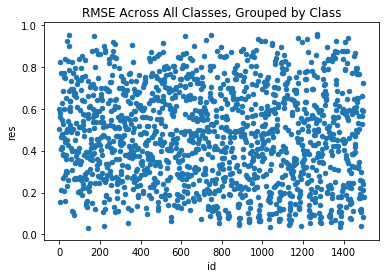

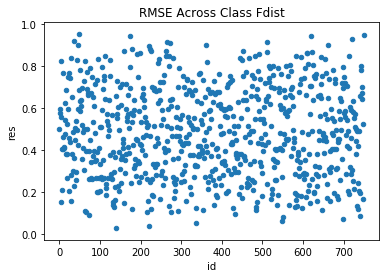

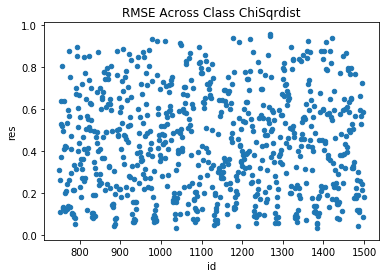

90% Confidence Interval Limits: ( 12.392999004886757 , 51.34033432844657 )
95% Confidence Interval Limits: ( 8.524816176757678 , 55.20851715657565 )
99% Confidence Interval Limits: ( 0.7381788076170324 , 62.9951545257163 )


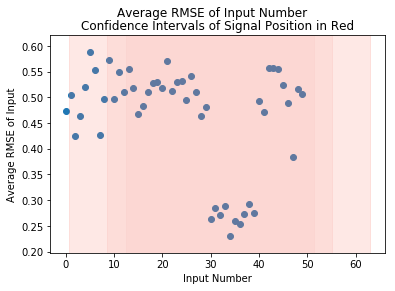

,Predicted Fdist,Predicted ChiSqrdist
Actual Fdist,405,345
Actual ChiSqrdist,305,445


In [7]:
DeepDiscovery(Xval = Xval, Yval = Yval, classnames = ['A', 'B'], 
              n = 50, model = mymodel, net = mynet)

## Gestalt Deep Learning

t-statistic = 6.610385034043203
t-test p-value = 5.3150425743481216e-11
KS statistic = 0.16533333333333336
KS p-value = 1.9119132771154434e-09
Strong Signals from Validation Set:
Fdist
val_AAA_0.csv, Input 4, Confidence 85.0%
val_AAA_0.csv, Input 30, Confidence 84.0%
val_AAA_1.csv, Input 14, Confidence 89.0%
val_AAA_1.csv, Input 16, Confidence 89.0%
val_AAA_1.csv, Input 24, Confidence 91.0%
val_AAA_1.csv, Input 43, Confidence 80.0%
val_AAA_1.csv, Input 46, Confidence 80.0%
val_AAA_2.csv, Input 14, Confidence 81.0%
val_AAA_2.csv, Input 32, Confidence 86.0%
val_AAA_2.csv, Input 33, Confidence 85.0%
val_AAA_2.csv, Input 35, Confidence 87.0%
val_AAA_2.csv, Input 38, Confidence 84.0%
val_AAA_2.csv, Input 39, Confidence 97.0%
val_AAA_3.csv, Input 10, Confidence 85.0%
val_AAA_3.csv, Input 28, Confidence 88.0%
val_AAA_4.csv, Input 16, Confidence 89.0%
val_AAA_4.csv, Input 19, Confidence 84.0%
val_AAA_4.csv, Input 20, Confidence 96.0%
val_AAA_4.csv, Input 25, Confidence 88.0%
val_AAA_4.csv, Inp

,Predicted Fdist,Predicted ChiSqrdist
Actual Fdist,14,1
Actual ChiSqrdist,0,15


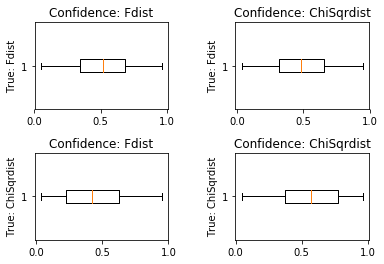

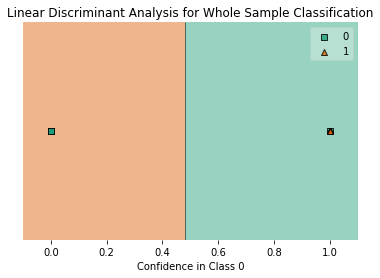

In [8]:
GestaltDL(Xval = Xval, Yval = Yval, valnames = valnames, classnames = ['A', 'B'],
          n = 50, perc = 90,  Xtest = Xtest, Ytest = Ytest, testnames = testnames, 
          model = mymodel, net = mynet)